# Inspecting TAP Results

Inspect and debug TextVQA predictions:
1. Image
2. Object regions (FasterRCNN)
3. Object classes (FasterRCNN)
4. OCR regions (Microsoft?)
5. OCR texts (Microsoft?)
6. Question text
7. Ground truth
8. Predicted answer

Val set, base model (49%) `/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json`

Val set, metadata `/usr0/home/ptejaswi/TAP/save/m4c_base_val`



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
%matplotlib inline

In [2]:
preds = {}
with open('/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json', 'rb') as fp:
    for x in json.loads(fp.read()):
        preds[x['question_id']] = x
print("Questions:", len(preds))

Questions: 5000


In [3]:
meta = {}
count = 0
# question_id
# image_id
# image_info_0
#   objects
#   bbox
#   max_features
#   object_tokens
# image_info_1
#   ocr_tokens
#   ocr_boxes
#   max_features

for fname in os.listdir('/usr0/home/ptejaswi/TAP/save/m4c_base_val'):
    if fname.endswith('.pkl'):
        fpath = os.path.join('/usr0/home/ptejaswi/TAP/save/m4c_base_val', fname)
        with open(fpath, 'rb') as fp:
            obj = pickle.load(fp)
            count += 1
            size = len(obj['question_id'])


print("Final count:", count)

Final count: 40


In [17]:
obj.keys()

odict_keys(['question_id', 'image_id', 'image_feature_0', 'image_info_0', 'image_feature_1', 'image_info_1', 'text_mask_label', 'text', 'text_len', 'obj_bbox_coordinates', 'objtext_mask_label', 'obj_text', 'obj_text_len', 'ocrtext_mask_label', 'ocr_text', 'ocr_text_len', 'context', 'context_tokens', 'context_tokens_enc', 'context_feature_0', 'context_info_0', 'context_feature_1', 'context_info_1', 'order_vectors', 'ocr_bbox_coordinates', 'overlap', 'overlap_obj', 'overlap_ocr', 'gt_answers_enc', 'targets', 'sampled_idx_seq', 'train_prev_inds', 'train_loss_mask', 'dataset_type', 'dataset_name', 'cmb_text', 'cmb_text_len', 'cmb_text_mask_label', 'dataset_type_', 'dataset_name_'])

In [19]:
obj['targets']

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
# info = np.load('data/feat_resx/train/fcccc16da71d6cf7_info.npy', allow_pickle=True)
image = np.load('data/feat_resx/train/fcccc16da71d6cf7.npy', allow_pickle=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

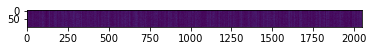

In [11]:
plt.imshow(image)

In [14]:
imdb_val_en = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_en.npy', allow_pickle=True)
imdb_val_en.shape

(5001,)

In [17]:
imdb_val_en[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'question_tokens': ['what', 'is', 'the', 'brand', 'of', 'this', 'camera'],
 'question_id': 34602,
 'set_name': 'val',
 'image_name': '003a8ae2ef43b901',
 'image_path': 'train/003a8ae2ef43b901.jpg',
 'feature_path': '003a8ae2ef43b901.npy',
 'valid_answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  '

In [14]:
import pickle
imdb_val_ml = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_ml.npy', allow_pickle=True, encoding='latin1')

In [16]:
imdb_val_ml[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'digrtal'],
 'ocr_info': [{'word': 'DAKOTA',
   'bounding_box': {'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'height': 0.071707926690578,
    'rotation': 0,
    'yaw': 0.92349565029144,
    'roll': 0,
    'pitch': 0}},
  {'word': 'DIGITAL',
   'bounding_bo

In [29]:
ocr_feat_resx = np.load('./data/ocr_feat_resx/textvqa_conf/train_images/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [30]:
ocr_feat_resx

array({'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'putla', 'digital'], 'ocr_conf': [0.982, 0.827, 0.687, 0.98, 0.562, 0.572], 'ocr_boxes': array([[154., 111., 264., 151.],
       [268., 119., 382., 159.],
       [156., 148., 282., 179.],
       [284., 156., 379., 188.],
       [164., 471., 219., 498.],
       [222., 476., 291., 503.]], dtype=float32)}, dtype=object)

In [32]:
feat_resx = np.load('./data/feat_resx/train/003a8ae2ef43b901.npy', allow_pickle=True, encoding='latin1')

In [37]:
feat_resx

array([[0.22993475, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.4620163 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5313767 , 0.        ,
        0.        ],
       ...,
       [1.9629928 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.4288037 ],
       [1.4602528 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [35]:
feat_resx_info = np.load('./data/feat_resx/train/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [36]:
feat_resx_info

array({'objects': array([ 454,  454,  716,  716,  293,  293,  716,  716,    0,  116,    0,
        716,  174,   53,  174,  716,  716,    0,    0,  716,    0,  716,
        293,    0,    0,  293,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1011,    0,    0,  716,    0,    0,  716,
        293,  116,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1039,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        116,    0,  290,    0,    0,    0,    0,    0,    0,  116,    0,
          0,    0,  116,    0,    0,    0,  716,    0,    0,  116,    0,
       1333]), 'num_boxes': 100, 'image_width': 1024, 'image_height': 664, 'bbox': array([[7.73108032e+02, 1.29258011e+02, 9.45364014e+02, 2.36494049e+02],
       [7.61260254e+02, 9.54738007e+01, 8.92723938e+02, 2.18872757e+02],
       [1.41798462e+02, 4.51006348e+02, 3.11763458e+02, 5.38420715e+02],
       [1.23604218e+02,